# We want to integrate an assembly model of a 4-mer square.... 

In [1]:
import numpy as np # import the numpy library for working with numerical arrays
from scipy.integrate import odeint # import the ode integration function from the scipy library
import matplotlib.pyplot as plt # import plotting library and adjust some defaults
%matplotlib inline
plt.rcParams['figure.figsize'] = [12,8]
plt.rcParams.update({'font.size': 16})
plt.style.use('seaborn-deep')

# 1.) First define a model function in the form the odeint function expects. 

In [7]:
def model(state,t):
    """
    The model needs to take as arguments a state vector and a time. The state vector will contain 
    concentrations of species.
    
    The model function will return the derivative for each component of the state at a given time using
    the description in Zlotnick and Endres 2002.
    """
    
       
    
    
    # unpack the concentrations of each component from the state vector
    m1 = state[0] # monomer
    m2 = state[1]
    m3 = state[2]
    m4 = state[3]
    
    # define statistical factors for degeneracy. Indexing refers to the species, not a reaction
    s2 = 1
    s3 = 1   
    s4 = 1

    
    
    # define the rate constants. Indexing refers to the species, not a reaction

    Ka = 2
    
    kf = 1
    kb = 1/Ka
    
    
    kf2 = kf
    kf3 = kf
    kf4 = kf
    
    kb2 = kb
    kb3 = kb
    kb4 = kb
    
    # calculate rates
    
    #    (Gain from m-1)-(Loss to m+1)+(Gain from m+1)-(loss to m-1)
    
    dm1dt =         0      -(kf2*s2*m1*m1) +(kb2*m2) -0
    dm2dt = (kf2*s2*m1*m1) -(kf3*s3*m1*m2) +(kb3*m3) -(kb2*m2)
    dm3dt = (kf3*s3*m1*m2) -(kf4*s4*m1*m3) +(kb4*m4) -(kb3*m3)
    dm4dt = (kf4*s4*m1*m3) -0              +0        -(kb4*m4)
    
    # return rates as a vector
    return [dm1dt,dm2dt,dm3dt,dm4dt]

    

# 2.) Initialize the state and make a sequence of time points.

In [10]:
Nstates = 4
state0 = np.zeros(Nstates) # initial state with 100% mass fraction monomer
state0[0]= 1
t = np.linspace(0,20,100) # Need a time vector. 100 linearly spaced points between 0 and 100


# 3.) Use odeint to integrate the model over the time series. 

Text(0, 0.5, 'Mass Fraction')

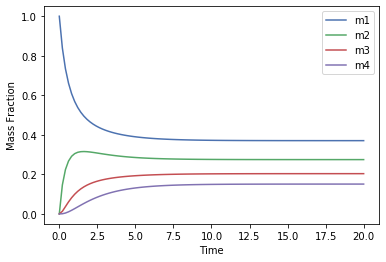

In [11]:
result = odeint(model,state0,t) 
"""
The result provided by odeint is NxM vector where N is the number of timepoints and M is
the number of components (odes) in the model.
"""
ax = plt.plot(t,result)
plt.legend(['m1', 'm2', "m3", "m4"])
plt.xlabel("Time")
plt.ylabel("Mass Fraction")
#plt.xlim(0,20)
#plt.ylim(0,100)
#optionally save figure
#plt.savefig("/home/user/Desktop/figure.png",dpi=300)